In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

#data files
nfl_stadiums_path = Path("../Data/nfl_stadiums.csv")
nfl_teams_path = Path("../Data/nfl_teams.csv")
spread_values_path = Path("../Data/spreadspoke_scores.csv")

# Read the stadiums, teams, and spread values
nfl_stadiums = pd.read_csv(nfl_stadiums_path, encoding='unicode_escape')
nfl_teams = pd.read_csv(nfl_teams_path, encoding='unicode_escape')
spread_values = pd.read_csv(spread_values_path, encoding='unicode_escape')

# Combine the data into a single DataFrame
team_stadium_merged = pd.merge(nfl_stadiums, nfl_teams,how ='left',on=["stadium_name"])

# Display the data table for preview
team_stadium_merged.head()

,stadium_name,stadium_location_x,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_zipcode,stadium_weather_type,stadium_capacity,stadium_surface,...,stadium_elevation,stadium_location_y,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,65500,Grass,...,367,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,...,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",NaN,indoor,65000,Grass,...,670,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",NaN,moderate,75024,Grass,...,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",NaN,warm,67814,Grass,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#collect column names within the dataframe 
team_stadium_merged.columns

Index(['stadium_name', 'stadium_location_x', 'stadium_open', 'stadium_close',
       'stadium_type', 'stadium_address', 'stadium_weather_station_zipcode',
       'stadium_weather_type', 'stadium_capacity', 'stadium_surface',
       'stadium_weather_station', 'stadium_weather_station_name',
       'stadium_latitude', 'stadium_longitude', 'stadium_azimuthangle',
       'stadium_elevation', 'stadium_location_y', 'team_name',
       'team_name_short', 'team_id', 'team_id_pfr', 'team_conference',
       'team_division', 'team_conference_pre2002', 'team_division_pre2002'],
      dtype='object')

In [14]:
#rename the columns so that they are easier to read
renamed_team_stadium_merged = team_stadium_merged.rename(columns ={"stadium_name":"Stadium Name", 
                                                                   "stadium_location_x":"Stadium Location",
                                                                   "stadium_open":"Year Opened", 
                                                                   "stadium_close":"Year Closed",
                                                                   "stadium_type": "Stadium Type", 
                                                                   "stadium_address": "Address", 
                                                                   "stadium_weather_station_zipcode":"Weather Station Zipcode",
                                                                   "stadium_weather_type": "Climate", 
                                                                   "stadium_capacity": "Stadium Capacity", 
                                                                   "stadium_surface": "Field Surface Type",
                                                                   "stadium_weather_station": "Weather Station",
                                                                   "stadium_weather_station_name": "Weather Station Name",
                                                                   "stadium_latitude": "Latitude", 
                                                                   "stadium_longitude": "Longitude", 
                                                                   "stadium_azimuthangle": "Dome Angle",
                                                                    "stadium_elevation": "Elevation (ft)", 
                                                                   "stadium_location_y":"Stadium Location2", 
                                                                   "team_name":"Team Name",
                                                                   "team_name_short":"Team Short Name", 
                                                                   "team_id":"Team ID", 
                                                                   "team_id_pfr": "Preferred ID", 
                                                                   "team_conference":"Conference (post 2002)",
                                                                "team_division": "Division (post 2002)", 
                                                                   "team_conference_pre2002": "Divison (pre 2002)", 
                                                                   "team_division_pre2002": "Divison (pre 2002)"})
renamed_team_stadium_merged.head()

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Weather Station Zipcode,Climate,Stadium Capacity,Field Surface Type,...,Elevation (ft),Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002)
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,...,367,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,...,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",NaN,indoor,65000,Grass,...,670,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",NaN,moderate,"75,024",Grass,...,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",NaN,warm,"67,814",Grass,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Export the renamed, merged data into a csv
renamed_team_stadium_merged.to_csv("new_team_stadium_data.csv",index_label="Index")

# Read saved data
renamed_team_stadium_merged = pd.read_csv("new_team_stadium_data.csv", index_col="Index")

#Display sample of data
renamed_team_stadium_merged.head()

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Weather Station Zipcode,Climate,Stadium Capacity,Field Surface Type,...,Elevation (ft),Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002).1
Index,,,,,,,,,,,,,,,,,,,,,
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,...,367,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,...,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",NaN,indoor,65000,Grass,...,670,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",NaN,moderate,"75,024",Grass,...,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",NaN,warm,"67,814",Grass,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Dropping columns that we do not need 
renamed_team_stadium_merged = renamed_team_stadium_merged.drop('Weather Station Zipcode', axis = 1)
renamed_team_stadium_merged = renamed_team_stadium_merged.drop('Weather Station', axis = 1)
renamed_team_stadium_merged = renamed_team_stadium_merged.drop('Weather Station Name', axis = 1)

#Verify the names of the remaining columns
renamed_team_stadium_merged.columns

Index(['Stadium Name', 'Stadium Location', 'Year Opened', 'Year Closed',
       'Stadium Type', 'Address', 'Climate', 'Stadium Capacity',
       'Field Surface Type', 'Latitude', 'Longitude', 'Dome Angle',
       'Elevation (ft)', 'Stadium Location2', 'Team Name', 'Team Short Name',
       'Team ID', 'Preferred ID', 'Conference (post 2002)',
       'Division (post 2002)', 'Divison (pre 2002)', 'Divison (pre 2002).1'],
      dtype='object')

In [17]:
renamed_team_stadium_merged

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Climate,Stadium Capacity,Field Surface Type,Latitude,...,Elevation (ft),Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002).1
Index,,,,,,,,,,,,,,,,,,,,,
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",cold,"65,500",Grass,40.484600,...,367,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",indoor,72000,FieldTurf,29.416944,...,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",indoor,65000,Grass,36.090750,...,670,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",moderate,"75,024",Grass,48.218800,...,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",warm,"67,814",Grass,30.323889,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,NaN,NaN,NaN,NaN,NaN,"285 Dodge Street, Buffalo, NY 14208",cold,"49,206",Grass,42.905650,...,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN,"Wembley, London HA9 0WS, United Kingdom",moderate,"90,000",Grass,51.555833,...,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,"1060 West Addison Street, Chicago, IL 60613",cold,"41,649",Grass,41.947460,...,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Calculate the total 

In [17]:
#Spread Columns
import pandas as pd

# Read the CSV file
spread_values = pd.read_csv(spread_values_path, encoding='unicode_escape')

# Print the column names
print(spread_values.columns)

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail'],
      dtype='object')


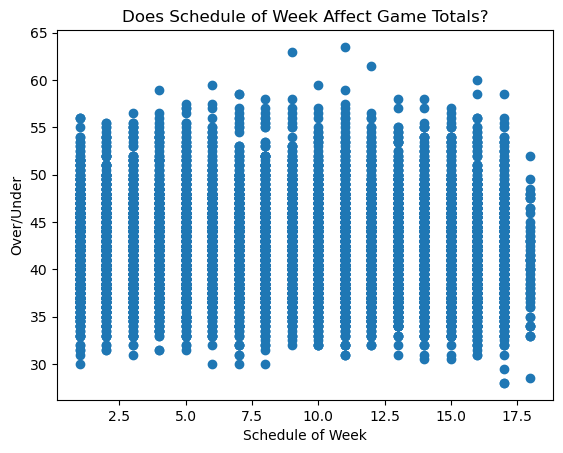

In [25]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
spread_values = pd.read_csv(spread_values_path, encoding='unicode_escape')

# Convert the columns to numeric data types
spread_values['schedule_week'] = pd.to_numeric(spread_values['schedule_week'], errors='coerce')
spread_values['over_under_line'] = pd.to_numeric(spread_values['over_under_line'], errors='coerce')

# Create a scatter plot
plt.scatter(spread_values['schedule_week'], spread_values['over_under_line'])

# Add labels and title
plt.xlabel('Schedule of Week')
plt.ylabel('Over/Under')
plt.title('Does Schedule of Week Affect Game Totals?')

# Display the plot
plt.show()

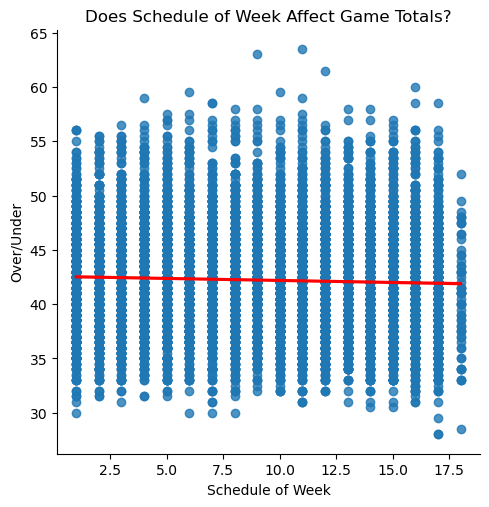

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read the CSV file
spread_values = pd.read_csv(spread_values_path, encoding='unicode_escape')

# Convert the columns to numeric data types
spread_values['schedule_week'] = pd.to_numeric(spread_values['schedule_week'], errors='coerce')
spread_values['over_under_line'] = pd.to_numeric(spread_values['over_under_line'], errors='coerce')

# Create a linear regression chart
sns.lmplot(x='schedule_week', y='over_under_line', data=spread_values, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Schedule of Week')
plt.ylabel('Over/Under')
plt.title('Does Schedule of Week Affect Game Totals?')

# Display the plot
plt.show()

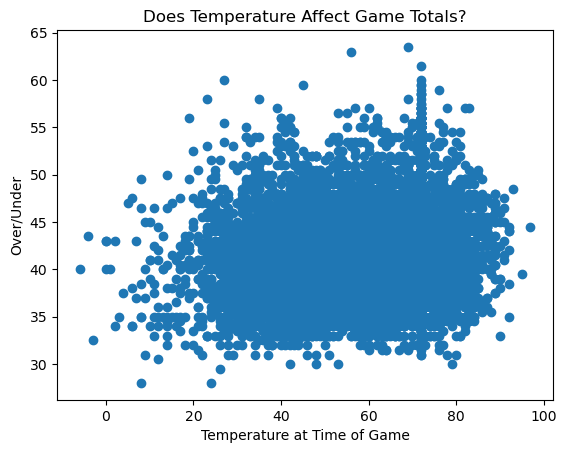

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
spread_values = pd.read_csv(spread_values_path, encoding='unicode_escape')

# Convert the columns to numeric data types
spread_values['weather_temperature'] = pd.to_numeric(spread_values['weather_temperature'], errors='coerce')
spread_values['over_under_line'] = pd.to_numeric(spread_values['over_under_line'], errors='coerce')

# Create a scatter plot
plt.scatter(spread_values['weather_temperature'], spread_values['over_under_line'])

# Add labels and title
plt.xlabel('Temperature at Time of Game')
plt.ylabel('Over/Under')
plt.title('Does Temperature Affect Game Totals?')

# Display the plot
plt.show()

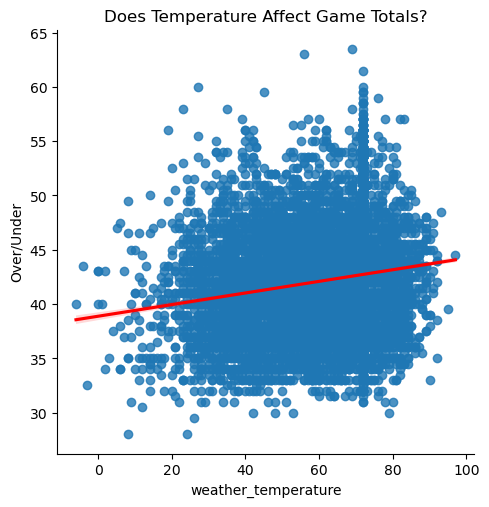

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read the CSV file
spread_values = pd.read_csv(spread_values_path, encoding='unicode_escape')

# Convert the columns to numeric data types
spread_values['weather_temperature'] = pd.to_numeric(spread_values['weather_temperature'], errors='coerce')
spread_values['over_under_line'] = pd.to_numeric(spread_values['over_under_line'], errors='coerce')

# Create a linear regression chart
sns.lmplot(x='weather_temperature', y='over_under_line', data=spread_values, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('weather_temperature')
plt.ylabel('Over/Under')
plt.title('Does Temperature Affect Game Totals?')

# Display the plot
plt.show()